In [1]:
import records

In [29]:
#the key for reptiles, used to exclude fish and insects from being lumped in with anole lizards
kwargs = {"classKey": "358"}

ep = records.Epochs("Anolis", 1950, 1971, 3, **kwargs)

In [30]:
ep.sdf.head(n = 10)

,species,year,epoch,country,stateProvince
0,Anolis carolinensis,1950,1950,United States,Georgia
1,Anolis carolinensis,1950,1950,United States,Florida
2,Anolis carolinensis,1950,1950,United States,Florida
3,Anolis carolinensis,1950,1950,United States,Florida
4,Anolis carolinensis,1950,1950,United States,Florida
5,Anolis carolinensis,1950,1950,United States,Florida
6,Anolis carolinensis,1950,1950,United States,Florida
7,Anolis carolinensis,1950,1950,United States,Florida
8,Anolis carolinensis,1950,1950,United States,Florida
9,Anolis sagrei,1950,1950,United States,Florida


In [31]:
ep.sdf.tail(n=10)

,species,year,epoch,country,stateProvince
2393,Anolis sagrei,1971,1968,United States,Florida
2394,Anolis carolinensis,1971,1968,United States,Florida
2395,Anolis carolinensis,1971,1968,United States,Florida
2396,Anolis carolinensis,1971,1968,United States,Florida
2397,NaN,1971,1968,United States,Florida
2398,Anolis sagrei,1971,1968,United States,Florida
2399,Anolis carolinensis,1971,1968,United States,Florida
2400,Anolis carolinensis,1971,1968,United States,South Carolina
2401,Anolis carolinensis,1971,1968,United States,Florida
2402,Anolis distichus,1971,1968,United States,Florida


In [35]:
print(ep.df['class'].unique())
print(ep.df.shape)
print(ep.sdf.shape)

['Reptilia']
(2403, 127)
(2403, 5)


In [46]:
#totally human mark zuckerburg, definitely not a lizard
mz = ep.sdf.dropna()
print(mz.shape)
print(mz['species'].unique())
print(mz['stateProvince'].unique())

(2314, 5)
['Anolis carolinensis' 'Anolis sagrei' 'Anolis distichus'
 'Anolis ordinatus' 'Anolis equestris' 'Crotalus cerastes'
 'Pantherophis guttatus' 'Anolis cybotes']
['Georgia' 'Florida' 'Texas' 'Louisiana' 'Alabama' 'North Carolina'
 'Hawaii' 'Arkansas' 'Oklahoma' 'South Carolina' 'Mississippi'
 'California']


In [56]:
#remove non-anole reptiles...

#https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe
#df[df['ids'].str.contains("ball")]

mz = mz[mz['species'].str.contains("Anolis")]
print(mz.shape)
print(mz['species'].unique())

(2310, 5)
['Anolis carolinensis' 'Anolis sagrei' 'Anolis distichus'
 'Anolis ordinatus' 'Anolis equestris' 'Anolis cybotes']


In [58]:
X_mz = mz['stateProvince']

In [59]:
y_mz = mz['species']

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
LabelEncoder = LabelEncoder()
X_int = LabelEncoder.fit_transform(X_mz)
OnehotEncoder = OneHotEncoder(sparse = False)
X_int = X_int.reshape(len(X_int), 1)
newX_mz = OnehotEncoder.fit_transform(X_int)

In [66]:
print(X_mz.shape)
print(newX_mz.shape)

(2310,)
(2310, 11)


In [67]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(newX_mz, y_mz,
                                                random_state=1)

In [70]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(newX_mz)
X_2D = model.transform(newX_mz)

In [71]:
import seaborn as sns

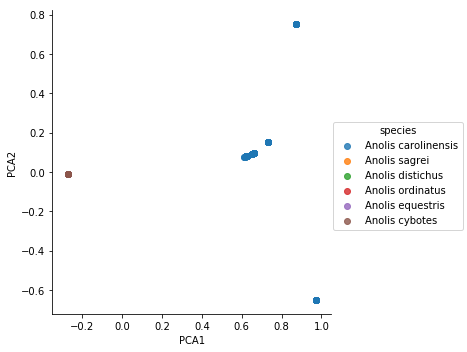

In [73]:
mz['PCA1'] = X_2D[:,0]
mz['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data = mz, fit_reg = False)

Anolis carolinensis appears to be widely distributed across different states/localities in the US.

In [79]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.370242214532872

low accuracy... (really just used this to follow along w/ reading)

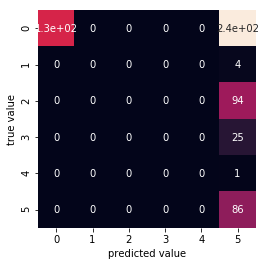

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [82]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.6366782006920415

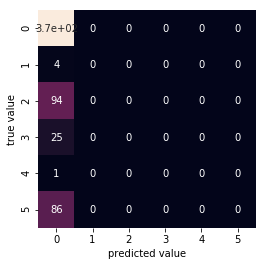

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

not really sure what this means...
(possible bias toward anolis carolinensis due to widespread introduction across US localities? how did that lil boi get to hawaii!)

## Summary

I attempted to use state/province data to predict species names within the anole genus "anolis". I tried two different modelling methods, the naive gaussian method and the SVC method. The former gave a lower accuracy metric. I tried to utilize confusion matrices to further validate the models.

Useful tools included chapter 5 "Machine Learning" in the Python Data Science book, the scikit learn documentation, and the figure in this link (http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)